# Training and errors analysis

## Imports and initializations

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from pipeline.core import CNNKerasTrainingReport

In [19]:
%matplotlib inline

## Utils

In [8]:
def dispay_image(row):
    """row is a 1D numpy array of int."""
    plt.imshow(255 - row.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.show()
    return None

## Read data

In [9]:
train_df = pd.read_csv('data/train.csv', sep=',', encoding='utf-8')
train_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
valid_df = pd.read_csv('data/valid.csv', sep=',', encoding='utf-8')
valid_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
valid_predictions_df = pd.read_csv('valid_predictions.csv', sep=',', encoding='utf-8')
valid_predictions_df.head(2)

,ImageId,Label
0,1,7
1,2,3


In [13]:
len(train_df), len(valid_df), len(valid_predictions_df)

(33600, 8400, 8400)

## Training analysis

In [3]:
training_report = CNNKerasTrainingReport.load('cnn_keras_no_dropout.report')

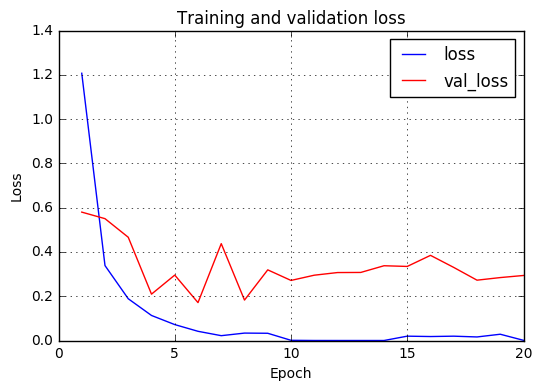

In [4]:
training_report.display_loss_curve()

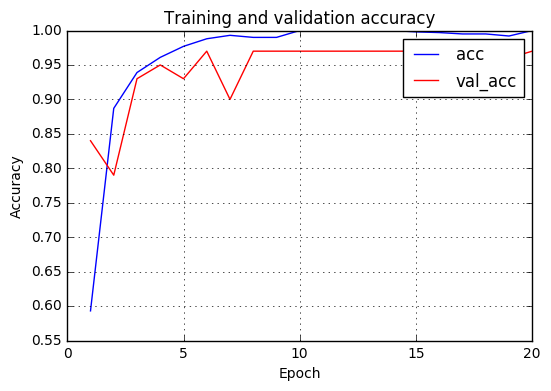

In [5]:
training_report.display_acc_curve()

## Errors analysis

In [16]:
true_labels = valid_df['label'].values
predicted_labels = valid_predictions_df['Label'].values
true_labels.shape, predicted_labels.shape

((8400,), (8400,))

In [17]:
wrong_predictions_ixes = []

for ix, (true_label, predicted_label) in enumerate(zip(true_labels, predicted_labels)):
    if true_label != predicted_label:
        wrong_predictions_ixes.append(ix)
        
len(wrong_predictions_ixes)

323

### Misclassifications distributions

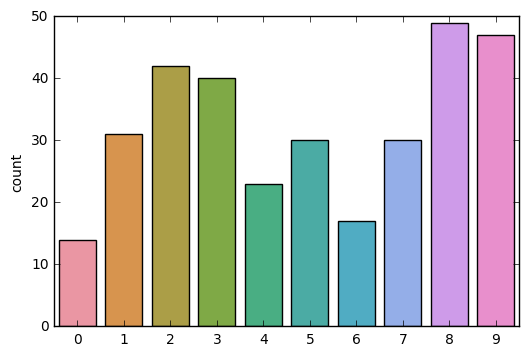

In [21]:
sns.countplot(true_labels[wrong_predictions_ixes])
plt.show()